In [1]:
# Imports 
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
import GetTripModel
import importlib

In [2]:
model = None

In [3]:
importlib.reload(GetTripModel)

class TrainingGetTripModel(GetTripModel.SpacyGetTripModel):
    def prepare_data(self, data):
        prepared_data = []
        for item in data:
            text = item['sentence']
            ents = []
            # This model only works with real trip sentences, ie with a departure and an arrival
            if len(item['entities']) != 2:
                continue
            for ent in item['entities']:
                ents.append((ent['start'], ent['end'], ent['label']))
            # Test for overlap
            if max(item['entities'][0]['start'], item['entities'][1]['start']) < min(item['entities'][0]['end'], item['entities'][1]['end']):
                continue

            prepared_data.append((text, {"entities": ents}))
        return prepared_data

# Refresh the methods of the model if it was already instanciated
if model:
    model.__class__ = TrainingGetTripModel
    TrainingGetTripModel.refresh_methods(model)

In [4]:
# Load data
model = TrainingGetTripModel()

# Training

In [5]:
num_positives = len([item for item in model.train_data if len(item[1]["entities"]) > 0])
num_negatives = len([item for item in model.train_data if len(item[1]["entities"]) == 0])
print(f"Exemples positifs : {num_positives}, Exemples négatifs : {num_negatives}")
print(f"Exemple d'entraînement : {model.train_data[0]}")


Exemples positifs : 3994, Exemples négatifs : 0
Exemple d'entraînement : ('je dois aller de plounerin à salome en train, quels sont les horaires disponibles demain ?', {'entities': [(17, 26, 'VILLE_DEPART'), (29, 35, 'VILLE_DESTINATION')]})


In [6]:
# Model creation
model.load_model("fr_core_news_md")

In [7]:
# Training
model.train(15, drop=0.30)

Iteration 1, losses : {'ner': 2217.9030715437116}
Iteration 2, losses : {'ner': 663.6107663548389}
Iteration 3, losses : {'ner': 475.4333369757489}
Iteration 4, losses : {'ner': 320.615310359056}
Iteration 5, losses : {'ner': 341.9739290861751}
Iteration 6, losses : {'ner': 300.7021124168088}
Iteration 7, losses : {'ner': 213.46203846892192}
Iteration 8, losses : {'ner': 217.34882681098566}
Iteration 9, losses : {'ner': 204.01500924676319}
Iteration 10, losses : {'ner': 173.1315842228459}
Iteration 11, losses : {'ner': 160.58245926558075}
Iteration 12, losses : {'ner': 167.49119133269554}
Iteration 13, losses : {'ner': 150.3602147695652}
Iteration 14, losses : {'ner': 134.66324244888511}
Iteration 15, losses : {'ner': 168.377847356138}


In [8]:
# Save the model
model.save("model_ner_trained")

# Testing

Model: Trained model


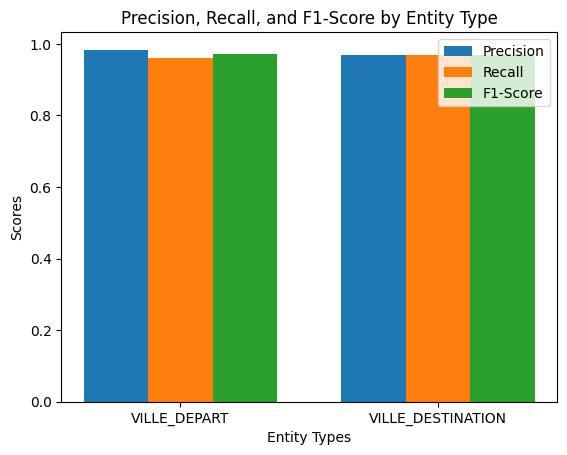

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.9768028240040343,
 'ents_r': 0.9646414342629482,
 'ents_f': 0.9706840390879478,
 'ents_per_type': {'VILLE_DEPART': {'p': 0.9836567926455567,
   'r': 0.9591633466135459,
   'f': 0.9712556732223903},
  'VILLE_DESTINATION': {'p': 0.9701195219123506,
   'r': 0.9701195219123506,
   'f': 0.9701195219123506}}}

In [9]:
model.evaluate_model(model.test_data, "Trained model")

# Validation

Model: Trained model


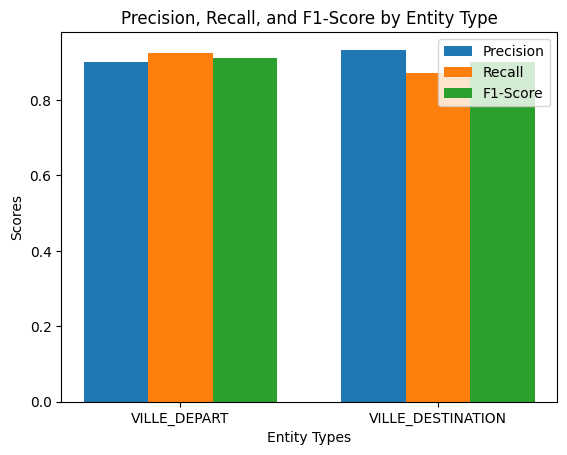

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.9160997732426304,
 'ents_r': 0.8977777777777778,
 'ents_f': 0.9068462401795735,
 'ents_per_type': {'VILLE_DEPART': {'p': 0.9004329004329005,
   'r': 0.9244444444444444,
   'f': 0.912280701754386},
  'VILLE_DESTINATION': {'p': 0.9333333333333333,
   'r': 0.8711111111111111,
   'f': 0.9011494252873562}}}

In [10]:
model.evaluate_model(model.validation_data, "Trained model")